<a href="https://colab.research.google.com/github/rafaelcoelho1409/Artificial-Intelligence/blob/main/Imagens_de_t%C3%B3rax_em_raio_x_para_classifica%C3%A7%C3%A3o_de_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Google Colab, I used a Kaggle dataset with chest X-ray images from several people to classify whether in the chest image, the patient got COVID-19,
pneumonia or is healthy, using CNNs - Convolutional Neural Networks.

The first step is to install the Kaggle API, which step-by-step installation you can follow from these two links:

https://github.com/Kaggle/kaggle-api/blob/master/README.md (english)

https://www.flai.com.br/renanbispo/como-utilizar-o-api-kaggle-no-google-colab/ (portuguese)

In [64]:
#from google.colab import files
#files.upload()
#Use the two codes below to import your Kaggle token inside Google Colab (file kaggle.json, that you can get from your Kaggle account)

In [65]:
!pip install kaggle --upgrade
#Installing and upgrading Kaggle API

Requirement already up-to-date: kaggle in /usr/local/lib/python3.7/dist-packages (1.5.12)


In [66]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
#Creating a directory to Kaggle

kaggle.json


In [67]:
#searching the COVID-19 dataset I'm going to use
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list -s 'Chest X-ray (Covid-19 & Pneumonia)'

ref                                                            title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
paultimothymooney/chest-xray-pneumonia                         Chest X-Ray Images (Pneumonia)                      2GB  2018-03-24 19:41:59         111925       3721  0.75             
prashant268/chest-xray-covid19-pneumonia                       Chest X-ray (Covid-19 & Pneumonia)                  2GB  2020-09-17 12:08:47           2720         54  0.5              
tawsifurrahman/covid19-radiography-database                    COVID-19 Radiography Database                     745MB  2021-03-06 18:17:46          19076        316  0.9375           
praveengovi/coronahack-chest-xraydataset                       CoronaHack -

In [68]:
#downloading dataset (the second from the list above)
!kaggle datasets download prashant268/chest-xray-covid19-pneumonia --unzip
#--unzip to extract the images from zip file

100% 2.05G/2.06G [00:34<00:00, 79.2MB/s]
100% 2.06G/2.06G [00:34<00:00, 63.9MB/s]


In [69]:
#Visualizing train directory
import os
print(os.listdir('Data/train/'))

['COVID19', 'PNEUMONIA', 'NORMAL']


In [70]:
import tensorflow as tf, matplotlib.pyplot as plt, numpy as np

#generating train dataset (400 samples)
train_images_covid = []
train_labels_covid = []
train_images_normal = []
train_labels_normal = []
train_images_pneumonia = []
train_labels_pneumonia = []

for x in os.listdir('Data/train/COVID19/')[:400]:
  image = tf.keras.preprocessing.image.load_img('Data/train/COVID19/{}'.format(x))
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = tf.image.resize(image, (300,300))
  train_images_covid.append(image)
  train_labels_covid.append(0) #Categoria 0: COVID-19
for x in os.listdir('Data/train/NORMAL/')[:400]:
  image = tf.keras.preprocessing.image.load_img('Data/train/NORMAL/{}'.format(x))
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = tf.image.resize(image, (300,300))
  train_images_normal.append(image)
  train_labels_normal.append(1) #Categoria 1: NORMAL
for x in os.listdir('Data/train/PNEUMONIA/')[:400]:
  image = tf.keras.preprocessing.image.load_img('Data/train/PNEUMONIA/{}'.format(x))
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = tf.image.resize(image, (300,300))
  train_images_pneumonia.append(image)
  train_labels_pneumonia.append(2) #Categoria 2: PNEUMONIA

print((len(train_images_covid),len(train_images_normal), len(train_images_pneumonia)))


(400, 400, 400)


In [71]:
#converting train dataset to Tensorflow tensors
train_images_covid = tf.convert_to_tensor(train_images_covid, dtype = tf.float32) / 255
train_images_normal = tf.convert_to_tensor(train_images_normal, dtype = tf.float32) / 255
train_images_pneumonia = tf.convert_to_tensor(train_images_pneumonia, dtype = tf.float32) / 255

train_images = tf.concat([train_images_covid, train_images_normal, train_images_pneumonia], 0)
train_labels = tf.concat([train_labels_covid, train_labels_normal, train_labels_pneumonia], 0)

print(len(train_images))
print(len(train_labels))


1200
1200


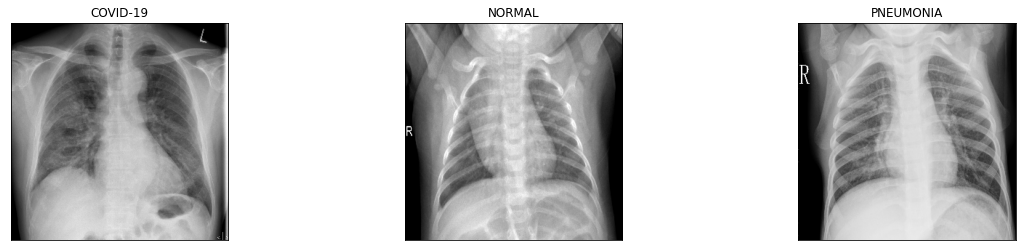

In [72]:
#plotting a sample of each image type from the training set
plt.figure(figsize = (20,4))
title = ['COVID-19', 'NORMAL', 'PNEUMONIA']
for i in [0, 400, 800]:
  ax = plt.subplot(1, 3, (i/400) + 1)
  plt.imshow(train_images[i].numpy())
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax.set_title(title[(i//400)])
plt.show()

In [73]:
#Visualizing the test set
print(os.listdir('Data/test'))

['COVID19', 'PNEUMONIA', 'NORMAL']


In [74]:
#generating the test dataset (100 samples)
test_images_covid = []
test_labels_covid = []
test_images_normal = []
test_labels_normal = []
test_images_pneumonia = []
test_labels_pneumonia = []

for x in os.listdir('Data/test/COVID19/')[:100]:
  image = tf.keras.preprocessing.image.load_img('Data/test/COVID19/{}'.format(x))
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = tf.image.resize(image, (300,300))
  test_images_covid.append(image)
  test_labels_covid.append(0)
for x in os.listdir('Data/test/NORMAL/')[:100]:
  image = tf.keras.preprocessing.image.load_img('Data/test/NORMAL/{}'.format(x))
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = tf.image.resize(image, (300,300))  
  test_images_normal.append(image)
  test_labels_normal.append(1)
for x in os.listdir('Data/test/PNEUMONIA/')[:100]:
  image = tf.keras.preprocessing.image.load_img('Data/test/PNEUMONIA/{}'.format(x))
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = tf.image.resize(image, (300,300))  
  test_images_pneumonia.append(image)
  test_labels_pneumonia.append(2)

print((len(test_images_covid), len(test_images_normal), len(test_images_pneumonia)))

(100, 100, 100)


In [75]:
#converting test dataset to Tensorflow tensor
test_images_covid = tf.convert_to_tensor(test_images_covid, dtype = tf.float32) / 255
test_images_normal = tf.convert_to_tensor(test_images_normal, dtype = tf.float32) / 255
test_images_pneumonia = tf.convert_to_tensor(test_images_pneumonia, dtype = tf.float32) / 255

test_images = tf.concat([test_images_covid, test_images_normal, test_images_pneumonia], 0)
test_labels = tf.concat([test_labels_covid, test_labels_normal, test_labels_pneumonia], 0)

print(len(test_images))
print(len(test_labels))

300
300


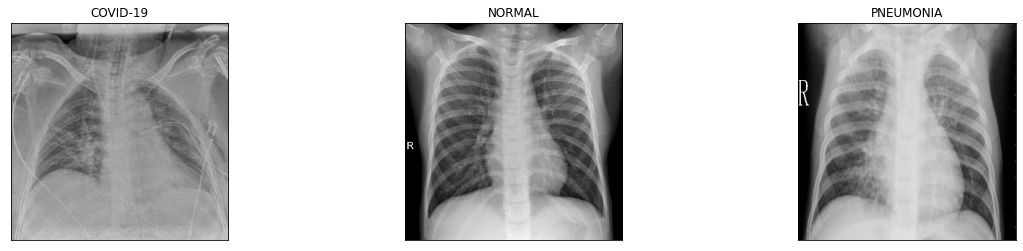

In [76]:
#plotting a sample from each image type of test dataset
plt.figure(figsize = (20,4))
title = ['COVID-19', 'NORMAL', 'PNEUMONIA']
for i in [0, 100, 200]:
  ax = plt.subplot(1, 3, (i/100) + 1)
  plt.imshow(test_images[i].numpy(), cmap = 'gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax.set_title(title[(i//100)])
plt.show()

In [77]:
#One-Hot-Encoder in train/test dataset labels
train_labels = tf.keras.utils.to_categorical(train_labels, 3)
test_labels = tf.keras.utils.to_categorical(test_labels, 3)

In [78]:
print(train_images.shape) #900 300x300x3 images (3 color channels (RGB))
print(test_images.shape) #300 300x300x3 images (3 color channels (RGB))

(1200, 300, 300, 3)
(300, 300, 300, 3)


In [79]:
#Adjusting datasets to flow inside the neural network
dataset_images = tf.concat([train_images, test_images], 0)
dataset_labels = tf.concat([train_labels, test_labels], 0)

dataset = tf.data.Dataset.from_tensor_slices((dataset_images, dataset_labels))
dataset = dataset.shuffle(1000)

train_dataset = dataset.take(1000).batch(50)
test_dataset = dataset.skip(1000).batch(50)


Finally, build the neural network model for image classification:

In [80]:
import tensorflow as tf, numpy as np

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (300,300,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(3, activation = 'softmax')) # 3 categorias: COVID-19, NORMAL e PNEUMONIA

model.summary() #Neural network summary

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 33, 33, 128)      

In [81]:
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.RMSprop(), metrics = ['accuracy'])
history = model.fit(train_dataset, batch_size = 50, epochs = 20, validation_data = test_dataset)

Epoch 1/20
20/20 [==============================] - 12s 524ms/step - loss: 5.5906 - accuracy: 0.3798 - val_loss: 0.8645 - val_accuracy: 0.5840
Epoch 2/20
20/20 [==============================] - 10s 498ms/step - loss: 0.9328 - accuracy: 0.6168 - val_loss: 0.5362 - val_accuracy: 0.8160
Epoch 3/20
20/20 [==============================] - 10s 500ms/step - loss: 1.1244 - accuracy: 0.7815 - val_loss: 0.5564 - val_accuracy: 0.7780
Epoch 4/20
20/20 [==============================] - 10s 502ms/step - loss: 0.5828 - accuracy: 0.7885 - val_loss: 0.3922 - val_accuracy: 0.8420
Epoch 5/20
20/20 [==============================] - 10s 503ms/step - loss: 0.3593 - accuracy: 0.8756 - val_loss: 0.5524 - val_accuracy: 0.7860
Epoch 6/20
20/20 [==============================] - 10s 497ms/step - loss: 0.4974 - accuracy: 0.8202 - val_loss: 0.2638 - val_accuracy: 0.9060
Epoch 7/20
20/20 [==============================] - 10s 497ms/step - loss: 0.2794 - accuracy: 0.9075 - val_loss: 0.3050 - val_accuracy: 0.8960

In [82]:
scores = model.evaluate(test_dataset, batch_size = 50)

10/10 [==============================] - 4s 109ms/step - loss: 0.0234 - accuracy: 0.9920


In [83]:
print('Test score:', scores[0], '; Test accuracy:', scores[1]) 
#99,20% Accuracy (remembering that we lost informations when resizing imagens, and also when we reduced dataset size, that is, although high accuracy, the model can't
#be so right as we wish it is. I needed to limit the dataset and resize the images because the RAM memory from Google Colab GPU option is limited).

Test score: 0.02338349260389805 ; Test accuracy: 0.9919999837875366


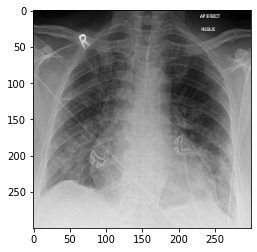

In [84]:
#Let's make some predictions; we can take some random x-ray image from internet related to this classification problem and make predictions.
image1 = tf.keras.utils.get_file('fx1_lrg.jpg', 'https://marlin-prod.literatumonline.com/cms/attachment/281794dd-b492-4928-a904-16e0bec813a3/fx1_lrg.jpg', extract = True)
image1 = tf.keras.preprocessing.image.load_img(image1)
image1 = tf.keras.preprocessing.image.img_to_array(image1) / 255
image1 = tf.image.resize(image1, (300,300))
plt.imshow(image1)


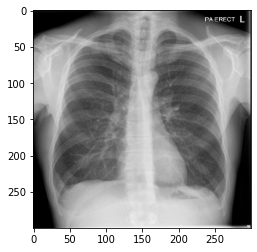

In [85]:
image2 = tf.keras.utils.get_file('dd921b172be2f5cb772eb9d16338a9f5.jpg', 'https://i.pinimg.com/originals/dd/92/1b/dd921b172be2f5cb772eb9d16338a9f5.jpg', extract = True)
image2 = tf.keras.preprocessing.image.load_img(image2)
image2 = tf.keras.preprocessing.image.img_to_array(image2) / 255
image2 = tf.image.resize(image2, (300,300))
plt.imshow(image2)

In [86]:
#Label 0: COVID-19
#Label 1: NORMAL
#Label 2: PNEUMONIA

In [87]:
#Redefining images format to make predictions
image1_predict = tf.expand_dims(image1, axis = 0)
image2_predict = tf.expand_dims(image1, axis = 0)

In [88]:
predict_1 = model.predict(image1_predict)
predict_classes_1 = model.predict_classes(image1_predict)
print(predict_1) #Probability from each class
print(predict_classes_1) #Predicted class (COVID-19)
print(np.argmax(predict_1)) #Probabilities maximum argument (Label 0)

[[1.0000000e+00 2.1511693e-20 4.5658481e-15]]
[0]
0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [89]:
predict_2 = model.predict(image2_predict)
predict_classes_2 = model.predict_classes(image2_predict)
print(predict_2) #Probability from each class
print(predict_classes_2) #Predicted class (COVID-19)
print(np.argmax(predict_2)) #Probabilities maximum argument (Label 0)

[[1.0000000e+00 2.1511693e-20 4.5658481e-15]]
[0]
0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
